# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import random
from pprint import pprint
import json

# Import API key

from api_keys import api_key         # PUT YOUR API KEY IN api_keys.py FILE

# Incorporated citipy to determine city based on latitude and longitude

from citipy import citipy

# Range of latitudes and longitudes

lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities

lat_lngs = []
cities = []

# Create a set of random lat and lng combinations

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # Replace spaces with %20 to create url correctly 
    
    city = city.replace(" ", "%20")
    
    # If the city is unique, then add it to a our cities list
    
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count

len(cities)

633

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Get Weather Data

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
api_key = api_key
target_url = f"{base_url}appid={api_key}&units={units}&q="
 

In [4]:
print(requests.get(target_url+city))

<Response [200]>


In [5]:
response = requests.get(target_url + city).json()
# pprint(response)
print(json.dumps(response, indent = 4, sort_keys = True))


{
    "base": "stations",
    "clouds": {
        "all": 89
    },
    "cod": 200,
    "coord": {
        "lat": -30.17,
        "lon": -50.22
    },
    "dt": 1558755298,
    "id": 3466165,
    "main": {
        "grnd_level": 1014.36,
        "humidity": 75,
        "pressure": 1015.82,
        "sea_level": 1015.82,
        "temp": 62.83,
        "temp_max": 62.83,
        "temp_min": 62.83
    },
    "name": "Cidreira",
    "sys": {
        "country": "BR",
        "message": 0.0056,
        "sunrise": 1558778707,
        "sunset": 1558816248
    },
    "timezone": -10800,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 190.17,
        "speed": 8.99
    }
}


In [6]:
# Set empty lists to hold information

city_name = []
country = []
latitude = []
longtitude = []
date = []
cloudiness = []
max_temperature = []
humidity = []
wind_speed = []

# Start counting cities from 1

city_counter = 1


print("Beginning Data Retrieval")
print("-----------------------------")

# Loop Through List of Cities & Perform a Request for Data on Each

for city in cities:
    
    try:
        
        city_response = requests.get(target_url + city).json()
        city_name.append(city_response["name"])
        country.append(city_response["sys"]["country"])
        latitude.append(city_response["coord"]["lat"])
        longtitude.append(city_response["coord"]["lon"])
        date.append(city_response["dt"])
        cloudiness.append(city_response["clouds"]["all"])
        max_temperature.append(city_response["main"]["temp_max"])
        humidity.append(city_response["main"]["humidity"])
        wind_speed.append(city_response["wind"]["speed"])
        city_records = city_response["name"]
        
        print(f"Processing Record {city_counter} | {city_records}")
        print(f"{target_url}{city}")
              
        city_counter = city_counter + 1
              
        time.sleep(1)

    except:
      
        print("City not found. Skipping...")
        
    continue

print("-----------------------------")
print(f"Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 | Cidreira
http://api.openweathermap.org/data/2.5/weather?appid=81225bf359549e1dbfdb005e57efaf3c&units=imperial&q=cidreira
Processing Record 2 | Moyale
http://api.openweathermap.org/data/2.5/weather?appid=81225bf359549e1dbfdb005e57efaf3c&units=imperial&q=moyale
Processing Record 3 | Yanam
http://api.openweathermap.org/data/2.5/weather?appid=81225bf359549e1dbfdb005e57efaf3c&units=imperial&q=yanam
Processing Record 4 | Coelho Neto
http://api.openweathermap.org/data/2.5/weather?appid=81225bf359549e1dbfdb005e57efaf3c&units=imperial&q=coelho%20neto
Processing Record 5 | Guerrero Negro
http://api.openweathermap.org/data/2.5/weather?appid=81225bf359549e1dbfdb005e57efaf3c&units=imperial&q=guerrero%20negro
Processing Record 6 | Saskylakh
http://api.openweathermap.org/data/2.5/weather?appid=81225bf359549e1dbfdb005e57efaf3c&units=imperial&q=saskylakh
Processing Record 7 | Hermanus
http://api.openweathermap.org/data/2.5/wea

Processing Record 57 | Castro
http://api.openweathermap.org/data/2.5/weather?appid=81225bf359549e1dbfdb005e57efaf3c&units=imperial&q=castro
Processing Record 58 | Oranjemund
http://api.openweathermap.org/data/2.5/weather?appid=81225bf359549e1dbfdb005e57efaf3c&units=imperial&q=oranjemund
Processing Record 59 | Chara
http://api.openweathermap.org/data/2.5/weather?appid=81225bf359549e1dbfdb005e57efaf3c&units=imperial&q=chara
Processing Record 60 | Florianopolis
http://api.openweathermap.org/data/2.5/weather?appid=81225bf359549e1dbfdb005e57efaf3c&units=imperial&q=florianopolis
Processing Record 61 | Hobart
http://api.openweathermap.org/data/2.5/weather?appid=81225bf359549e1dbfdb005e57efaf3c&units=imperial&q=hobart
Processing Record 62 | Padang
http://api.openweathermap.org/data/2.5/weather?appid=81225bf359549e1dbfdb005e57efaf3c&units=imperial&q=padang
Processing Record 63 | Vao
http://api.openweathermap.org/data/2.5/weather?appid=81225bf359549e1dbfdb005e57efaf3c&units=imperial&q=vao
Proces

Processing Record 113 | San Cristobal
http://api.openweathermap.org/data/2.5/weather?appid=81225bf359549e1dbfdb005e57efaf3c&units=imperial&q=san%20cristobal
Processing Record 114 | Bredasdorp
http://api.openweathermap.org/data/2.5/weather?appid=81225bf359549e1dbfdb005e57efaf3c&units=imperial&q=bredasdorp
City not found. Skipping...
Processing Record 115 | Longyearbyen
http://api.openweathermap.org/data/2.5/weather?appid=81225bf359549e1dbfdb005e57efaf3c&units=imperial&q=longyearbyen
Processing Record 116 | Port Lincoln
http://api.openweathermap.org/data/2.5/weather?appid=81225bf359549e1dbfdb005e57efaf3c&units=imperial&q=port%20lincoln
City not found. Skipping...
Processing Record 117 | Inhambane
http://api.openweathermap.org/data/2.5/weather?appid=81225bf359549e1dbfdb005e57efaf3c&units=imperial&q=inhambane
Processing Record 118 | Perelyub
http://api.openweathermap.org/data/2.5/weather?appid=81225bf359549e1dbfdb005e57efaf3c&units=imperial&q=perelyub
Processing Record 119 | Esperance
http

Processing Record 167 | Puerto Leguizamo
http://api.openweathermap.org/data/2.5/weather?appid=81225bf359549e1dbfdb005e57efaf3c&units=imperial&q=puerto%20leguizamo
Processing Record 168 | Lompoc
http://api.openweathermap.org/data/2.5/weather?appid=81225bf359549e1dbfdb005e57efaf3c&units=imperial&q=lompoc
Processing Record 169 | Cravo Norte
http://api.openweathermap.org/data/2.5/weather?appid=81225bf359549e1dbfdb005e57efaf3c&units=imperial&q=cravo%20norte
Processing Record 170 | Kirakira
http://api.openweathermap.org/data/2.5/weather?appid=81225bf359549e1dbfdb005e57efaf3c&units=imperial&q=kirakira
Processing Record 171 | Kosh-Agach
http://api.openweathermap.org/data/2.5/weather?appid=81225bf359549e1dbfdb005e57efaf3c&units=imperial&q=kosh-agach
Processing Record 172 | Ust-Nera
http://api.openweathermap.org/data/2.5/weather?appid=81225bf359549e1dbfdb005e57efaf3c&units=imperial&q=ust-nera
Processing Record 173 | Nishihara
http://api.openweathermap.org/data/2.5/weather?appid=81225bf359549e1db

Processing Record 222 | Xining
http://api.openweathermap.org/data/2.5/weather?appid=81225bf359549e1dbfdb005e57efaf3c&units=imperial&q=xining
Processing Record 223 | Saint George
http://api.openweathermap.org/data/2.5/weather?appid=81225bf359549e1dbfdb005e57efaf3c&units=imperial&q=saint%20george
Processing Record 224 | North Bend
http://api.openweathermap.org/data/2.5/weather?appid=81225bf359549e1dbfdb005e57efaf3c&units=imperial&q=north%20bend
Processing Record 225 | Trail
http://api.openweathermap.org/data/2.5/weather?appid=81225bf359549e1dbfdb005e57efaf3c&units=imperial&q=trail
Processing Record 226 | Juybar
http://api.openweathermap.org/data/2.5/weather?appid=81225bf359549e1dbfdb005e57efaf3c&units=imperial&q=juybar
Processing Record 227 | Shahrud
http://api.openweathermap.org/data/2.5/weather?appid=81225bf359549e1dbfdb005e57efaf3c&units=imperial&q=shahrud
Processing Record 228 | Wajir
http://api.openweathermap.org/data/2.5/weather?appid=81225bf359549e1dbfdb005e57efaf3c&units=imperial

Processing Record 277 | Grand Gaube
http://api.openweathermap.org/data/2.5/weather?appid=81225bf359549e1dbfdb005e57efaf3c&units=imperial&q=grand%20gaube
Processing Record 278 | San Quintin
http://api.openweathermap.org/data/2.5/weather?appid=81225bf359549e1dbfdb005e57efaf3c&units=imperial&q=san%20quintin
Processing Record 279 | Coquimbo
http://api.openweathermap.org/data/2.5/weather?appid=81225bf359549e1dbfdb005e57efaf3c&units=imperial&q=coquimbo
Processing Record 280 | Zhangye
http://api.openweathermap.org/data/2.5/weather?appid=81225bf359549e1dbfdb005e57efaf3c&units=imperial&q=zhangye
Processing Record 281 | Palaikastron
http://api.openweathermap.org/data/2.5/weather?appid=81225bf359549e1dbfdb005e57efaf3c&units=imperial&q=palaikastron
Processing Record 282 | Muzhi
http://api.openweathermap.org/data/2.5/weather?appid=81225bf359549e1dbfdb005e57efaf3c&units=imperial&q=muzhi
Processing Record 283 | Broken Hill
http://api.openweathermap.org/data/2.5/weather?appid=81225bf359549e1dbfdb005e5

Processing Record 332 | Kyzyl-Suu
http://api.openweathermap.org/data/2.5/weather?appid=81225bf359549e1dbfdb005e57efaf3c&units=imperial&q=kyzyl-suu
Processing Record 333 | Yima
http://api.openweathermap.org/data/2.5/weather?appid=81225bf359549e1dbfdb005e57efaf3c&units=imperial&q=yima
Processing Record 334 | Komsomolskiy
http://api.openweathermap.org/data/2.5/weather?appid=81225bf359549e1dbfdb005e57efaf3c&units=imperial&q=komsomolskiy
Processing Record 335 | Ulladulla
http://api.openweathermap.org/data/2.5/weather?appid=81225bf359549e1dbfdb005e57efaf3c&units=imperial&q=ulladulla
Processing Record 336 | Virklund
http://api.openweathermap.org/data/2.5/weather?appid=81225bf359549e1dbfdb005e57efaf3c&units=imperial&q=virklund
Processing Record 337 | Huilong
http://api.openweathermap.org/data/2.5/weather?appid=81225bf359549e1dbfdb005e57efaf3c&units=imperial&q=huilong
City not found. Skipping...
Processing Record 338 | Itarema
http://api.openweathermap.org/data/2.5/weather?appid=81225bf359549e1

Processing Record 388 | Menongue
http://api.openweathermap.org/data/2.5/weather?appid=81225bf359549e1dbfdb005e57efaf3c&units=imperial&q=menongue
Processing Record 389 | Benguela
http://api.openweathermap.org/data/2.5/weather?appid=81225bf359549e1dbfdb005e57efaf3c&units=imperial&q=benguela
Processing Record 390 | Talnakh
http://api.openweathermap.org/data/2.5/weather?appid=81225bf359549e1dbfdb005e57efaf3c&units=imperial&q=talnakh
Processing Record 391 | Springbok
http://api.openweathermap.org/data/2.5/weather?appid=81225bf359549e1dbfdb005e57efaf3c&units=imperial&q=springbok
City not found. Skipping...
Processing Record 392 | Cananea
http://api.openweathermap.org/data/2.5/weather?appid=81225bf359549e1dbfdb005e57efaf3c&units=imperial&q=cananea
Processing Record 393 | Khromtau
http://api.openweathermap.org/data/2.5/weather?appid=81225bf359549e1dbfdb005e57efaf3c&units=imperial&q=khromtau
City not found. Skipping...
Processing Record 394 | Mafeteng
http://api.openweathermap.org/data/2.5/weat

Processing Record 442 | Grants
http://api.openweathermap.org/data/2.5/weather?appid=81225bf359549e1dbfdb005e57efaf3c&units=imperial&q=grants
Processing Record 443 | Bullhead City
http://api.openweathermap.org/data/2.5/weather?appid=81225bf359549e1dbfdb005e57efaf3c&units=imperial&q=bullhead%20city
City not found. Skipping...
Processing Record 444 | Lundazi
http://api.openweathermap.org/data/2.5/weather?appid=81225bf359549e1dbfdb005e57efaf3c&units=imperial&q=lundazi
Processing Record 445 | Jurm
http://api.openweathermap.org/data/2.5/weather?appid=81225bf359549e1dbfdb005e57efaf3c&units=imperial&q=jurm
Processing Record 446 | Junin
http://api.openweathermap.org/data/2.5/weather?appid=81225bf359549e1dbfdb005e57efaf3c&units=imperial&q=junin
Processing Record 447 | Saldanha
http://api.openweathermap.org/data/2.5/weather?appid=81225bf359549e1dbfdb005e57efaf3c&units=imperial&q=saldanha
Processing Record 448 | Khash
http://api.openweathermap.org/data/2.5/weather?appid=81225bf359549e1dbfdb005e57e

Processing Record 497 | Tromso
http://api.openweathermap.org/data/2.5/weather?appid=81225bf359549e1dbfdb005e57efaf3c&units=imperial&q=tromso
Processing Record 498 | Lodja
http://api.openweathermap.org/data/2.5/weather?appid=81225bf359549e1dbfdb005e57efaf3c&units=imperial&q=lodja
Processing Record 499 | Palmer
http://api.openweathermap.org/data/2.5/weather?appid=81225bf359549e1dbfdb005e57efaf3c&units=imperial&q=palmer
Processing Record 500 | Ibra
http://api.openweathermap.org/data/2.5/weather?appid=81225bf359549e1dbfdb005e57efaf3c&units=imperial&q=ibra
City not found. Skipping...
Processing Record 501 | Bangkal
http://api.openweathermap.org/data/2.5/weather?appid=81225bf359549e1dbfdb005e57efaf3c&units=imperial&q=bangkal
Processing Record 502 | Neuquen
http://api.openweathermap.org/data/2.5/weather?appid=81225bf359549e1dbfdb005e57efaf3c&units=imperial&q=neuquen
Processing Record 503 | Diamantino
http://api.openweathermap.org/data/2.5/weather?appid=81225bf359549e1dbfdb005e57efaf3c&units=i

City not found. Skipping...
Processing Record 554 | Ossora
http://api.openweathermap.org/data/2.5/weather?appid=81225bf359549e1dbfdb005e57efaf3c&units=imperial&q=ossora
City not found. Skipping...
Processing Record 555 | Robertsport
http://api.openweathermap.org/data/2.5/weather?appid=81225bf359549e1dbfdb005e57efaf3c&units=imperial&q=robertsport
Processing Record 556 | Porteirinha
http://api.openweathermap.org/data/2.5/weather?appid=81225bf359549e1dbfdb005e57efaf3c&units=imperial&q=porteirinha
Processing Record 557 | Ucluelet
http://api.openweathermap.org/data/2.5/weather?appid=81225bf359549e1dbfdb005e57efaf3c&units=imperial&q=ucluelet
Processing Record 558 | Byron Bay
http://api.openweathermap.org/data/2.5/weather?appid=81225bf359549e1dbfdb005e57efaf3c&units=imperial&q=byron%20bay
Processing Record 559 | Nyuksenitsa
http://api.openweathermap.org/data/2.5/weather?appid=81225bf359549e1dbfdb005e57efaf3c&units=imperial&q=nyuksenitsa
Processing Record 560 | Bin Qirdan
http://api.openweathe

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# Create a Data Frame 

weather_data = {
            "City": city_name,
            "Cloudiness": cloudiness,
            "Country": country,
            "Date": date,
            "Humidity": humidity,
            "Lat": latitude,
            "Lng": longtitude,
            "Max Temp": max_temperature,
            "Wind Speed": wind_speed
}

weather_df = pd.DataFrame(weather_data)
weather_df.count()

City          566
Cloudiness    566
Country       566
Date          566
Humidity      566
Lat           566
Lng           566
Max Temp      566
Wind Speed    566
dtype: int64

In [8]:
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Cidreira,89,BR,1558755298,75,-30.17,-50.22,62.83,8.99
1,Moyale,36,ET,1558755446,93,3.52,39.05,66.61,6.20
2,Yanam,40,IN,1558755448,63,16.73,82.22,91.40,9.17
3,Coelho Neto,26,BR,1558755449,97,-4.25,-43.02,73.09,2.19
4,Guerrero Negro,0,MX,1558755355,80,27.97,-114.04,63.19,15.68


In [9]:
# Export results in to CSV file

weather_df.to_csv("../Resources/Weather_data.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

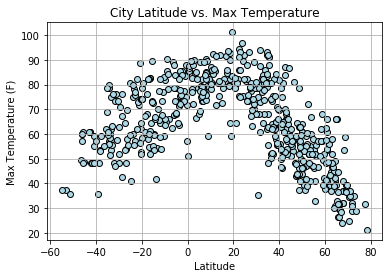

In [10]:
# Create a scatter plot

plt.scatter(weather_df["Lat"], weather_df["Max Temp"], facecolors = "lightblue", edgecolors = "black")
plt.grid()

# Create Title and Labels

plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Save figure in PNG file

plt.savefig("../Images/City_Latitude_vs._Max_Temperature.png")

#### Latitude vs. Humidity Plot

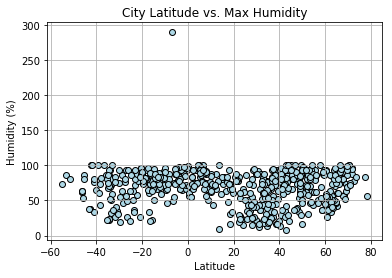

In [11]:
# Create a scatter plot

plt.scatter(weather_df["Lat"], weather_df["Humidity"], facecolors = "lightblue", edgecolors = "black")
plt.grid()

# Create Title and Labels

plt.title("City Latitude vs. Max Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save figure in PNG file

plt.savefig("../Images/City_Latitude_vs._Humidity.png")

#### Latitude vs. Cloudiness Plot

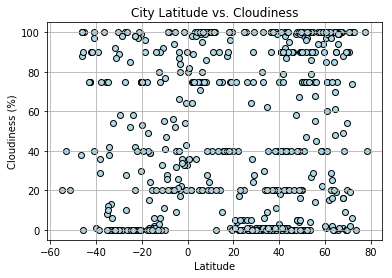

In [12]:
# Create a scatter plot

plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], facecolors = "lightblue", edgecolors = "black")
plt.grid()

# Create Title and Labels

plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save figure in PNG file

plt.savefig("../Images/City_Latitude_vs._Cloudiness.png")

#### Latitude vs. Wind Speed Plot

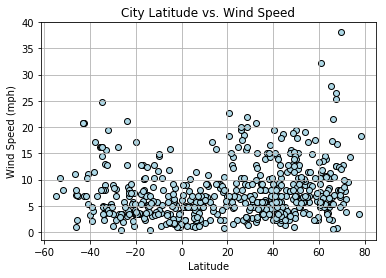

In [13]:
# Create a scatter plot

plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], facecolors = "lightblue", edgecolors = "black")
plt.grid()

# Create Title and Labels

plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Save figure in PNG file

plt.savefig("../Images/City_Latitude_vs._Wind_Speed.png")